<a href="https://www.kaggle.com/code/reihanenamdari/forbes-billionairs?scriptVersionId=114002832" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
!ls../import/image
%matplotlib inline

/bin/bash: ls../import/image: No such file or directory


In [2]:
df = pd.read_csv('../input/forbes-billionaires-data-preprocessed/Forbes Billionaires.csv')
df.head()

,Rank,Name,Networth,Age,Country,Source,Industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rank      2600 non-null   int64  
 1   Name      2600 non-null   object 
 2   Networth  2600 non-null   float64
 3   Age       2600 non-null   int64  
 4   Country   2600 non-null   object 
 5   Source    2600 non-null   object 
 6   Industry  2600 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 142.3+ KB


****First 100 Billionairs****

In [4]:
df_100 = pd.read_csv('../input/forbes-billionaires-data-preprocessed/Forbes Billionaires.csv',nrows = 100)
df_100.shape

(100, 7)

# How old are billionairs?

In [5]:
df['Age'].describe()

count    2600.000000
mean       64.271923
std        13.220607
min        19.000000
25%        55.000000
50%        64.000000
75%        74.000000
max       100.000000
Name: Age, dtype: float64

[Text(0.5, 1.0, 'Age distributaion of the billionairs')]

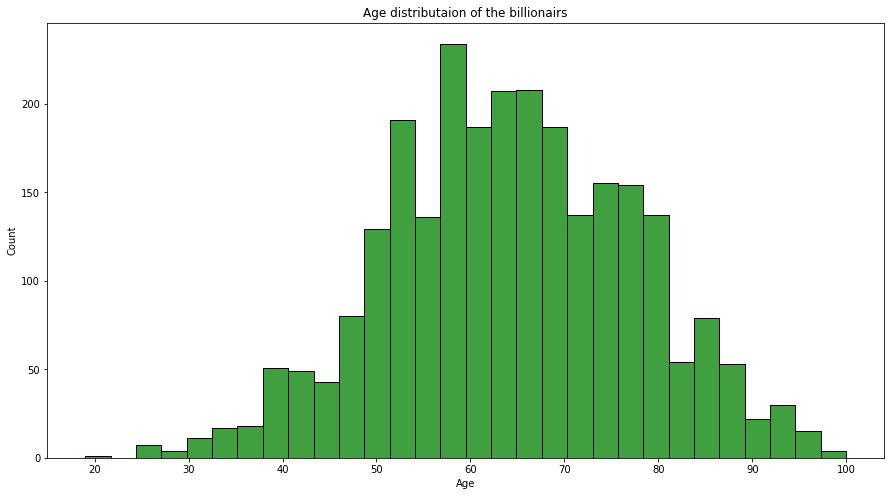

In [6]:
plt.figure(figsize = (15,8))
sns.histplot(x='Age', data=df, stat = 'count', color = 'green').set(
    title="Age distributaion of the billionairs")

# Who is the Youngest Billionair?

In [7]:
df.loc[df.Age == 19] 

,Rank,Name,Networth,Age,Country,Source,Industry
1311,1292,Kevin David Lehmann,2.4,19,Germany,drugstores,Fashion & Retail


**kevin david lehmann**

In [8]:
Image(url='https://www.delhi-magazine.com/wp-content/uploads/2021/10/Kevin-David-lehmann.png', width = 200, height = 200)

# What billionairs do?

In [9]:
Cumilative_Net_Industry=df.groupby(['Industry']).sum().sort_values('Networth',ascending = False)
Cumilative_Net_Industry.reset_index(inplace = True)

<AxesSubplot:xlabel='Networth', ylabel='Industry'>

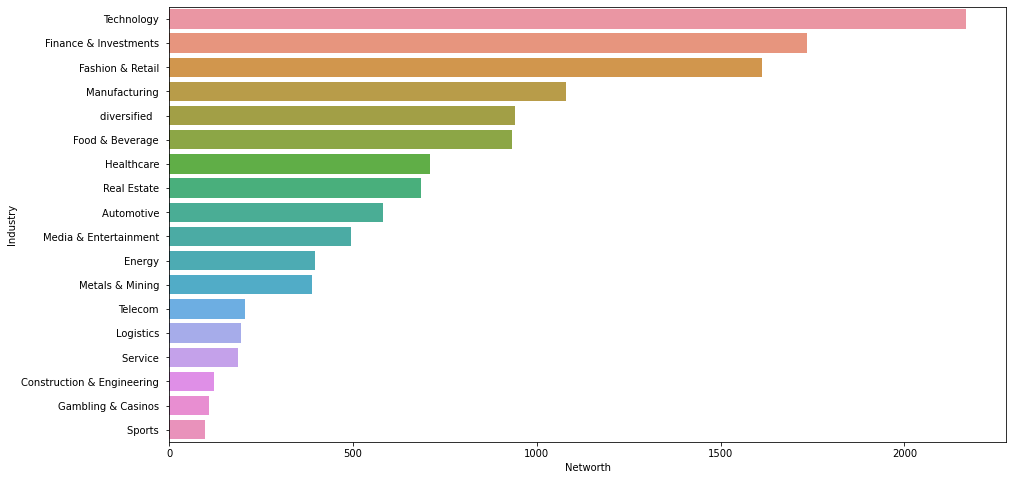

In [10]:
plt.figure(figsize = (15,8))
sns.barplot(x='Networth', y = 'Industry', data = Cumilative_Net_Industry)

# Where billionairs come from?

In [11]:
country = df['Country']
country_counts = country.value_counts()
country_counts.head(20)

United States     719
China             515
India             161
Germany           130
Russia             81
Hong Kong          67
Canada             64
Brazil             60
Italy              52
Taiwan             51
United Kingdom     49
Sweden             45
Australia          44
France             43
Switzerland        41
South Korea        41
Japan              36
Indonesia          30
Israel             29
Thailand           28
Name: Country, dtype: int64

<AxesSubplot:ylabel='Country'>

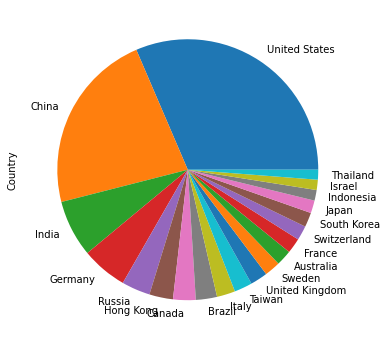

In [12]:
df['Country'].value_counts().head(20).plot(kind = 'pie', figsize = (6,6))


# Cumilative Net worth in countries

In [13]:
Cumilative_Net_country= df.groupby(['Country'])['Networth'].sum().reset_index()
Cumilative_Net_country = Cumilative_Net_country.sort_values('Networth', ascending= False)
print(Cumilative_Net_country)

                Country  Networth
70        United States   4685.10
11                China   1938.45
28                India    744.80
22              Germany    604.00
20               France    550.00
..                  ...       ...
4              Barbados      1.70
64             Tanzania      1.50
60  St. Kitts and Nevis      1.50
42                Nepal      1.50
17              Estonia      1.20

[75 rows x 2 columns]


<AxesSubplot:xlabel='Networth', ylabel='Country'>

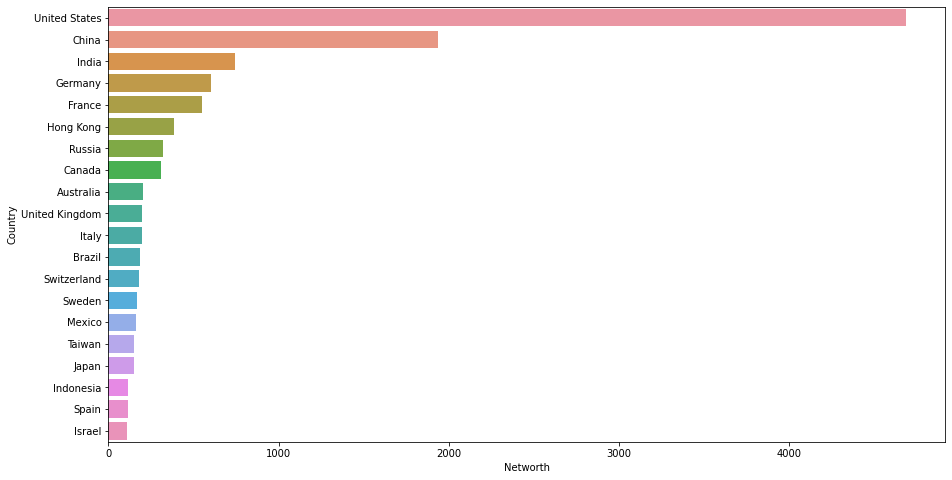

In [14]:
plt.figure(figsize = (15,8))
sns.barplot(x='Networth', y = 'Country', data = Cumilative_Net_country.head(20)) #using first 20 countries for better vizualization